In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import requests
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

651

In [5]:
cities

['namibe',
 'chuy',
 'kapaa',
 'esperance',
 'kudahuvadhoo',
 'abu dhabi',
 'barrow',
 'rikitea',
 'vaini',
 'albany',
 'armacao dos buzios',
 'port alfred',
 'saint-philippe',
 'taolanaro',
 'mahebourg',
 'puerto ayora',
 'arraial do cabo',
 'pangnirtung',
 'obo',
 'hobart',
 'zarubino',
 'umm lajj',
 'bluff',
 'cabedelo',
 'tasiilaq',
 'atuona',
 'cidreira',
 'hermanus',
 'sur',
 'okhotsk',
 'malwan',
 'mataura',
 'turan',
 'aklavik',
 'xai-xai',
 'ushuaia',
 'pervomayskiy',
 'saskylakh',
 'west fargo',
 'waingapu',
 'khatanga',
 'busselton',
 'cape town',
 'grand river south east',
 'sao joao da barra',
 'port lincoln',
 'upernavik',
 'san miguel siguila',
 'guayaramerin',
 'merauke',
 'iquique',
 'avarua',
 'nikolskoye',
 'katherine',
 'esna',
 'pevek',
 'gimli',
 'kiruna',
 'matay',
 'dikson',
 'toora-khem',
 'wuwei',
 'guozhen',
 'male',
 'buchanan',
 'attawapiskat',
 'laranjeiras do sul',
 'mys shmidta',
 'kruisfontein',
 'castro',
 'kodiak',
 'sitka',
 'komsomolskiy',
 'krynych

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=faf0b3a56ae8e1d08d219ca62c9931f9


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping..." + city + str(i))
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | kudahuvadhoo
Processing Record 6 of Set 1 | abu dhabi
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | armacao dos buzios
City not found. Skipping...armacao dos buzios10
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...taolanaro13
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | pangnirtung
Processing Record 19 of Set 1 | obo
Processing Record 20 of Set 1 | hobart
Processing Record 21 of S

Processing Record 31 of Set 4 | tuatapere
Processing Record 32 of Set 4 | nuuk
Processing Record 33 of Set 4 | genhe
Processing Record 34 of Set 4 | borodino
Processing Record 35 of Set 4 | tuktoyaktuk
Processing Record 36 of Set 4 | provideniya
Processing Record 37 of Set 4 | amapa
Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | corpus christi
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | khandyga
Processing Record 43 of Set 4 | bahia de caraquez
Processing Record 44 of Set 4 | jimenez
Processing Record 45 of Set 4 | mongo
Processing Record 46 of Set 4 | sakakah
Processing Record 47 of Set 4 | rezh
Processing Record 48 of Set 4 | beringovskiy
Processing Record 49 of Set 4 | madison heights
Processing Record 50 of Set 4 | vila franca do campo
Processing Record 1 of Set 5 | chapais
Processing Record 2 of Set 5 | louisbourg
City not found. Skipping...louisbourg201
Processing Record 3 of Set 

City not found. Skipping...ciras361
Processing Record 13 of Set 8 | tecoanapa
Processing Record 14 of Set 8 | bintulu
Processing Record 15 of Set 8 | chifeng
Processing Record 16 of Set 8 | vandavasi
Processing Record 17 of Set 8 | putina
Processing Record 18 of Set 8 | la palma
Processing Record 19 of Set 8 | mackenzie
Processing Record 20 of Set 8 | mossoro
Processing Record 21 of Set 8 | noshiro
Processing Record 22 of Set 8 | haverfordwest
Processing Record 23 of Set 8 | mao
Processing Record 24 of Set 8 | rantepao
Processing Record 25 of Set 8 | hofn
Processing Record 26 of Set 8 | lysyye gory
Processing Record 27 of Set 8 | wamba
Processing Record 28 of Set 8 | samarai
Processing Record 29 of Set 8 | oranjemund
Processing Record 30 of Set 8 | caldas novas
Processing Record 31 of Set 8 | ola
Processing Record 32 of Set 8 | kodinsk
Processing Record 33 of Set 8 | salalah
Processing Record 34 of Set 8 | touros
Processing Record 35 of Set 8 | saldanha
Processing Record 36 of Set 8 | 

Processing Record 48 of Set 11 | jardim
Processing Record 49 of Set 11 | avera
Processing Record 50 of Set 11 | mangan
Processing Record 1 of Set 12 | porbandar
Processing Record 2 of Set 12 | auki
Processing Record 3 of Set 12 | lusambo
Processing Record 4 of Set 12 | urdoma
Processing Record 5 of Set 12 | carutapera
Processing Record 6 of Set 12 | umzimvubu
City not found. Skipping...umzimvubu555
Processing Record 7 of Set 12 | gamboma
Processing Record 8 of Set 12 | grindavik
Processing Record 9 of Set 12 | gangotri
City not found. Skipping...gangotri558
Processing Record 10 of Set 12 | jomalig
City not found. Skipping...jomalig559
Processing Record 11 of Set 12 | bambanglipuro
Processing Record 12 of Set 12 | coquimbo
Processing Record 13 of Set 12 | clearwater
Processing Record 14 of Set 12 | santa isabel do rio negro
Processing Record 15 of Set 12 | khasan
Processing Record 16 of Set 12 | shelabolikha
Processing Record 17 of Set 12 | havoysund
Processing Record 18 of Set 12 | por

In [8]:
city_data

[{'City': 'Namibe',
  'Lat': -15.1961,
  'Lng': 12.1522,
  'Max Temp': 78.31,
  'Humidity': 63,
  'Cloudiness': 100,
  'Wind Speed': 11.45,
  'Country': 'AO',
  'Date': '2021-01-31 13:32:54'},
 {'City': 'Chuy',
  'Lat': -33.6971,
  'Lng': -53.4616,
  'Max Temp': 68.86,
  'Humidity': 90,
  'Cloudiness': 100,
  'Wind Speed': 17.98,
  'Country': 'UY',
  'Date': '2021-01-31 13:29:55'},
 {'City': 'Kapaa',
  'Lat': 22.0752,
  'Lng': -159.319,
  'Max Temp': 71.6,
  'Humidity': 83,
  'Cloudiness': 40,
  'Wind Speed': 18.41,
  'Country': 'US',
  'Date': '2021-01-31 13:29:55'},
 {'City': 'Esperance',
  'Lat': -33.8667,
  'Lng': 121.9,
  'Max Temp': 64.4,
  'Humidity': 68,
  'Cloudiness': 0,
  'Wind Speed': 12.66,
  'Country': 'AU',
  'Date': '2021-01-31 13:32:54'},
 {'City': 'Kudahuvadhoo',
  'Lat': 2.6708,
  'Lng': 72.8944,
  'Max Temp': 81.81,
  'Humidity': 78,
  'Cloudiness': 13,
  'Wind Speed': 12.86,
  'Country': 'MV',
  'Date': '2021-01-31 13:32:54'},
 {'City': 'Abu Dhabi',
  'Lat': 24.466

In [9]:
city_data[0]

{'City': 'Namibe',
 'Lat': -15.1961,
 'Lng': 12.1522,
 'Max Temp': 78.31,
 'Humidity': 63,
 'Cloudiness': 100,
 'Wind Speed': 11.45,
 'Country': 'AO',
 'Date': '2021-01-31 13:32:54'}

In [10]:
city_weather

{'coord': {'lon': -126.8329, 'lat': 65.282},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': -20.2,
  'feels_like': -30.39,
  'temp_min': -20.2,
  'temp_max': -20.2,
  'pressure': 1032,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 290},
 'clouds': {'all': 75},
 'dt': 1612100140,
 'sys': {'type': 1,
  'id': 951,
  'country': 'CA',
  'sunrise': 1612113546,
  'sunset': 1612137748},
 'timezone': -25200,
 'id': 6089245,
 'name': 'Norman Wells',
 'cod': 200}

In [11]:
len(city_data)

588

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Namibe,-15.1961,12.1522,78.31,63,100,11.45,AO,2021-01-31 13:32:54
1,Chuy,-33.6971,-53.4616,68.86,90,100,17.98,UY,2021-01-31 13:29:55
2,Kapaa,22.0752,-159.3190,71.60,83,40,18.41,US,2021-01-31 13:29:55
3,Esperance,-33.8667,121.9000,64.40,68,0,12.66,AU,2021-01-31 13:32:54
4,Kudahuvadhoo,2.6708,72.8944,81.81,78,13,12.86,MV,2021-01-31 13:32:54
5,Abu Dhabi,24.4667,54.3667,73.40,56,0,14.97,AE,2021-01-31 13:31:22
6,Barrow,71.2906,-156.7887,-16.60,76,90,8.05,US,2021-01-31 13:32:15
7,Rikitea,-23.1203,-134.9692,78.42,73,33,11.39,PF,2021-01-31 13:32:54
8,Vaini,-21.2000,-175.2000,71.60,100,90,4.61,TO,2021-01-31 13:32:54
9,Albany,42.6001,-73.9662,6.01,64,97,2.17,US,2021-01-31 13:32:55


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Namibe,AO,2021-01-31 13:32:54,-15.1961,12.1522,78.31,63,100,11.45
1,Chuy,UY,2021-01-31 13:29:55,-33.6971,-53.4616,68.86,90,100,17.98
2,Kapaa,US,2021-01-31 13:29:55,22.0752,-159.3190,71.60,83,40,18.41
3,Esperance,AU,2021-01-31 13:32:54,-33.8667,121.9000,64.40,68,0,12.66
4,Kudahuvadhoo,MV,2021-01-31 13:32:54,2.6708,72.8944,81.81,78,13,12.86
...,...,...,...,...,...,...,...,...,...
583,Dunedin,NZ,2021-01-31 13:35:39,-45.8742,170.5036,60.01,81,100,5.32
584,Cervo,ES,2021-01-31 13:35:39,43.6702,-7.4101,62.01,82,78,10.00
585,Tezu,IN,2021-01-31 13:35:39,27.9167,96.1667,59.97,42,4,4.34
586,Estrela,BR,2021-01-31 13:35:40,-28.0611,-50.9383,67.89,96,100,5.23


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

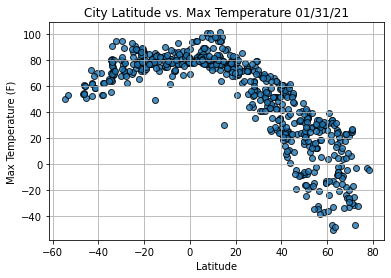

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

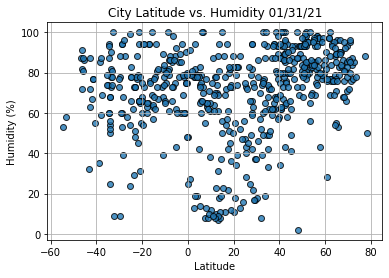

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

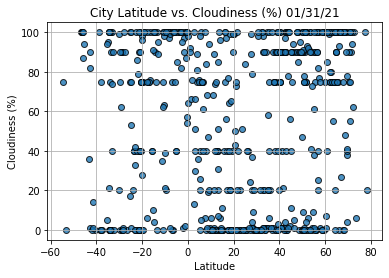

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

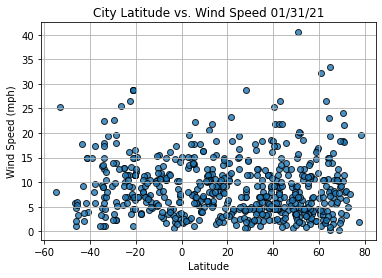

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()